In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/Electric_Production.csv", index_col="DATE", parse_dates=True)

In [10]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [11]:
df.loc["1985"]

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [12]:
df.loc["1985-01":"1985-04"]

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714


In [13]:
# making average production of 1981
df.loc["1985"].mean()

IPG2211A2N    62.165667
dtype: float64

In [14]:
df.head(5)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [15]:
df.tail(5)

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [16]:
# making average production of every year
year_avg_prod = []
for i in range(1985, 2018):
    year_avg_prod.append(df.loc[f"{i}"].mean())
    print(f"Year {i} :- mean",df.loc[f"{i}"].mean())

Year 1985 :- mean IPG2211A2N    62.165667
dtype: float64
Year 1986 :- mean IPG2211A2N    62.709892
dtype: float64
Year 1987 :- mean IPG2211A2N    65.740275
dtype: float64
Year 1988 :- mean IPG2211A2N    69.716358
dtype: float64
Year 1989 :- mean IPG2211A2N    71.895167
dtype: float64
Year 1990 :- mean IPG2211A2N    73.313433
dtype: float64
Year 1991 :- mean IPG2211A2N    75.11185
dtype: float64
Year 1992 :- mean IPG2211A2N    75.120908
dtype: float64
Year 1993 :- mean IPG2211A2N    77.678992
dtype: float64
Year 1994 :- mean IPG2211A2N    79.255058
dtype: float64
Year 1995 :- mean IPG2211A2N    82.060867
dtype: float64
Year 1996 :- mean IPG2211A2N    84.382417
dtype: float64
Year 1997 :- mean IPG2211A2N    84.236192
dtype: float64
Year 1998 :- mean IPG2211A2N    86.544075
dtype: float64
Year 1999 :- mean IPG2211A2N    89.190892
dtype: float64
Year 2000 :- mean IPG2211A2N    91.790125
dtype: float64
Year 2001 :- mean IPG2211A2N    91.460792
dtype: float64
Year 2002 :- mean IPG2211A2N    

In [17]:
year_avg_prod

[IPG2211A2N    62.165667
 dtype: float64,
 IPG2211A2N    62.709892
 dtype: float64,
 IPG2211A2N    65.740275
 dtype: float64,
 IPG2211A2N    69.716358
 dtype: float64,
 IPG2211A2N    71.895167
 dtype: float64,
 IPG2211A2N    73.313433
 dtype: float64,
 IPG2211A2N    75.11185
 dtype: float64,
 IPG2211A2N    75.120908
 dtype: float64,
 IPG2211A2N    77.678992
 dtype: float64,
 IPG2211A2N    79.255058
 dtype: float64,
 IPG2211A2N    82.060867
 dtype: float64,
 IPG2211A2N    84.382417
 dtype: float64,
 IPG2211A2N    84.236192
 dtype: float64,
 IPG2211A2N    86.544075
 dtype: float64,
 IPG2211A2N    89.190892
 dtype: float64,
 IPG2211A2N    91.790125
 dtype: float64,
 IPG2211A2N    91.460792
 dtype: float64,
 IPG2211A2N    94.107075
 dtype: float64,
 IPG2211A2N    95.700108
 dtype: float64,
 IPG2211A2N    97.119225
 dtype: float64,
 IPG2211A2N    99.208242
 dtype: float64,
 IPG2211A2N    98.873225
 dtype: float64,
 IPG2211A2N    101.984167
 dtype: float64,
 IPG2211A2N    101.663992
 dtype: 

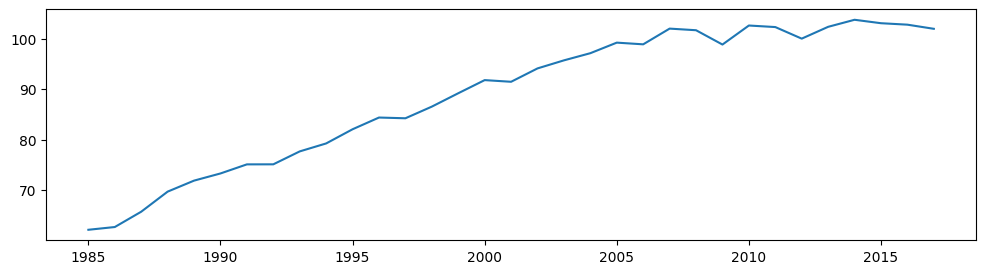

In [18]:
plt.figure(figsize=(12, 3))
plt.plot(range(1985 ,2018),year_avg_prod)

<Axes: xlabel='DATE'>

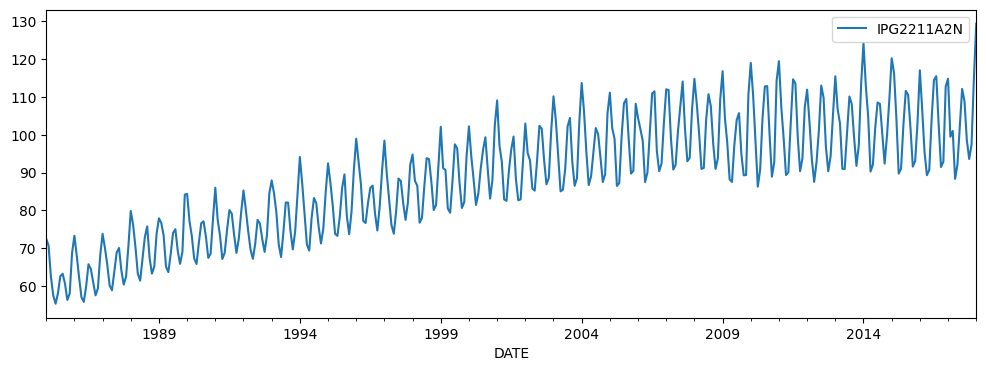

In [19]:
df.plot(figsize=(12,4))

In [20]:
# To find pattern
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:


res = seasonal_decompose(df["IPG2211A2N"])

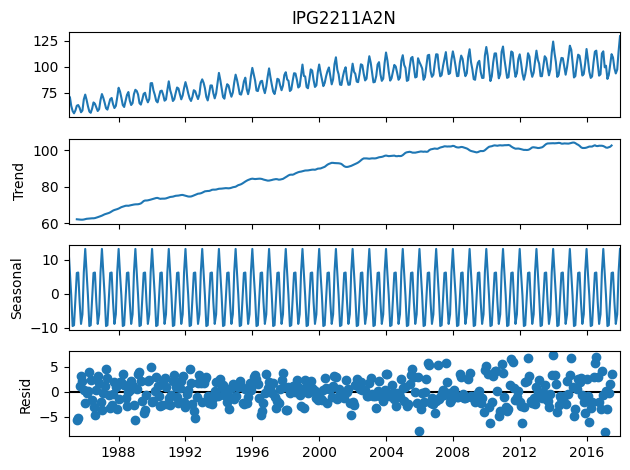

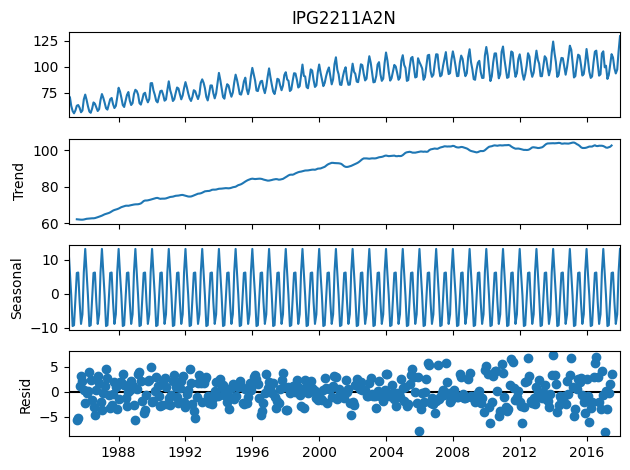

In [22]:
res.plot()

In [23]:
len(df)

397

In [24]:
train = df.iloc[:385]
test = df.iloc[385:]

In [25]:
train.shape

(385, 1)

In [26]:
test.shape

(12, 1)

In [27]:
train.iloc[0], train.iloc[-1]

(IPG2211A2N    72.5052
 Name: 1985-01-01 00:00:00, dtype: float64,
 IPG2211A2N    114.8505
 Name: 2017-01-01 00:00:00, dtype: float64)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(train)

MinMaxScaler()

In [31]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [32]:
scaled_train[:10]

array([[0.24934943],
       [0.22275812],
       [0.10349754],
       [0.03127801],
       [0.        ],
       [0.04025686],
       [0.10596346],
       [0.11507721],
       [0.07643625],
       [0.01450976]])

In [33]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n = 3

In [35]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n, batch_size=1)

In [36]:
generator[0]

(array([[[0.24934943],
         [0.22275812],
         [0.10349754]]]),
 array([[0.03127801]]))

In [37]:
scaled_train[:6]

array([[0.24934943],
       [0.22275812],
       [0.10349754],
       [0.03127801],
       [0.        ],
       [0.04025686]])

In [38]:
generator[1]

(array([[[0.22275812],
         [0.10349754],
         [0.03127801]]]),
 array([[0.]]))

In [39]:
generator[2]

(array([[[0.10349754],
         [0.03127801],
         [0.        ]]]),
 array([[0.04025686]]))

In [40]:
X, y = generator[0]

In [41]:
X.shape

(1, 3, 1)

In [42]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=12, batch_size=1)

In [43]:
X, y = generator[0]

In [44]:
X.shape

(1, 12, 1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [47]:
model = Sequential([
    LSTM(1000, activation="relu", input_shape=(12,1)),
    Dense(1)
])

In [48]:
model.compile(optimizer="adam", loss="mse")

In [49]:
model.fit(generator, epochs=40)

Epoch 1/40
373/373 [==============================] - 74s 193ms/step - loss: 0.0258
Epoch 2/40
373/373 [==============================] - 71s 189ms/step - loss: 0.0078
Epoch 3/40
373/373 [==============================] - 64s 173ms/step - loss: 0.0060
Epoch 4/40
373/373 [==============================] - 69s 186ms/step - loss: 0.0044
Epoch 5/40
373/373 [==============================] - 70s 188ms/step - loss: 0.0036
Epoch 6/40
373/373 [==============================] - 69s 185ms/step - loss: 0.0036
Epoch 7/40
373/373 [==============================] - 74s 199ms/step - loss: 0.0028
Epoch 8/40
373/373 [==============================] - 69s 185ms/step - loss: 0.0034
Epoch 9/40
373/373 [==============================] - 66s 176ms/step - loss: 0.0032
Epoch 10/40
373/373 [==============================] - 67s 178ms/step - loss: 0.0030
Epoch 11/40
373/373 [==============================] - 65s 173ms/step - loss: 0.0025
Epoch 12/40
373/373 [==============================] - 66s 177ms/step - lo

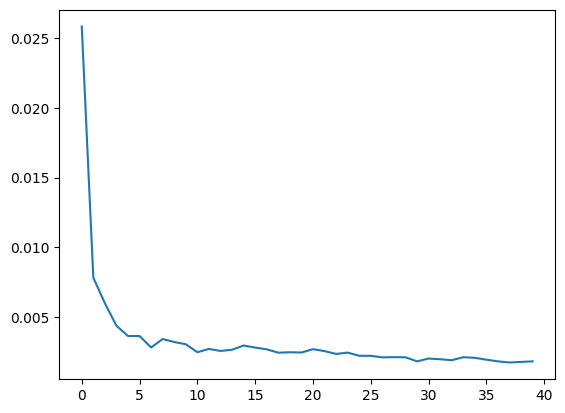

In [50]:
loss = model.history.history["loss"]
plt.plot(loss)

In [51]:
last_train_batch = scaled_train[-12:]

In [52]:
last_train_batch = last_train_batch.reshape((1,12,1))

In [53]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 256ms/step


array([[0.7079017]], dtype=float32)

In [54]:
scaled_test[0]

array([0.64077645])

In [57]:
0.7079017 - 0.64077645

0.06712524999999991

In [61]:
y_pred = []

first_eval_batch = scaled_train[-12:]
currBatch = first_eval_batch.reshape((1, 12, 1))

for i in range(len(test)):
    currPred = model.predict(currBatch)[0]
    y_pred.append(currPred)

    currBatch = np.append(currBatch[:,1:,:], [[currPred]], axis=1)

1/1 [==============================] - 0s 37ms/step


In [62]:
true_pred = scaler.inverse_transform(y_pred)
true_pred

array([[104.11770274],
       [ 94.13645193],
       [ 86.64984506],
       [ 90.71718953],
       [102.31783294],
       [109.45858441],
       [108.73690573],
       [ 99.68938127],
       [ 90.32047336],
       [ 91.22719449],
       [105.29170238],
       [111.52878992]])

In [63]:
test["Predicted_Production"] = true_pred

<ipython-input-63-5251aa00c8b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted_Production"] = true_pred


In [64]:
test.head()

,IPG2211A2N,Predicted_Production
DATE,,
2017-02-01,99.4901,104.117703
2017-03-01,101.0396,94.136452
2017-04-01,88.3530,86.649845
2017-05-01,92.0805,90.717190
2017-06-01,102.1532,102.317833


<Axes: xlabel='DATE'>

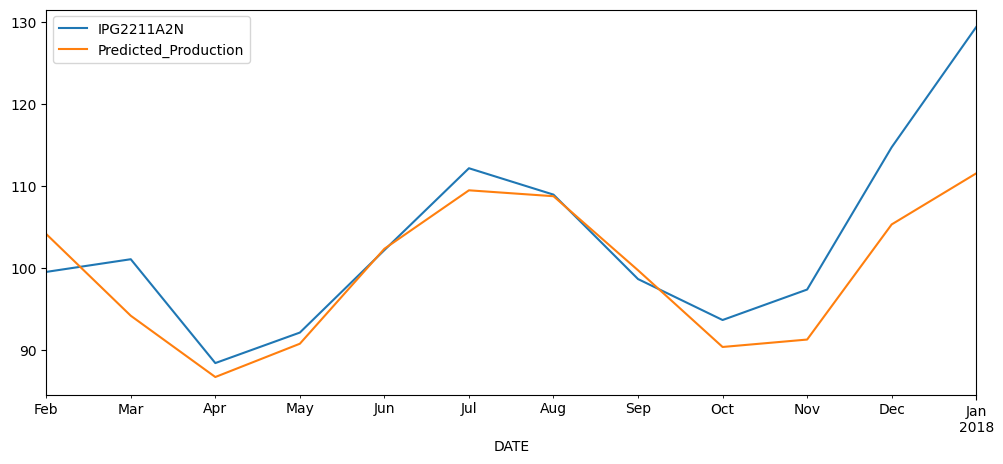

In [65]:
test.plot(figsize=(12,5))

In [66]:
from sklearn.metrics import mean_squared_error

In [69]:
rmse = np.sqrt(mean_squared_error(test["IPG2211A2N"], test["Predicted_Production"]))

In [70]:
rmse

6.701609112504807